In [17]:
sys.path.insert(1, os.path.abspath('/Users/jonasvvr/Documents/KULeuven/thesis/Soccer-EPV-Framework/LaurieOnTracking/'))

In [18]:
import sklearn.model_selection
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import soccermap_model
import pandas as pd
import numpy as np
import sklearn


In [19]:
%pip install tensorflow-macos
import tensorflow as tf

You should consider upgrading via the '/Users/jonasvvr/.pyenv/versions/3.10.3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
FIELD_DIMEN = (108, 72)
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-4sekj9hgwxzq3y4ih9415239w'
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'
SAVE_DIR = '../out/pass_data.pkl'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

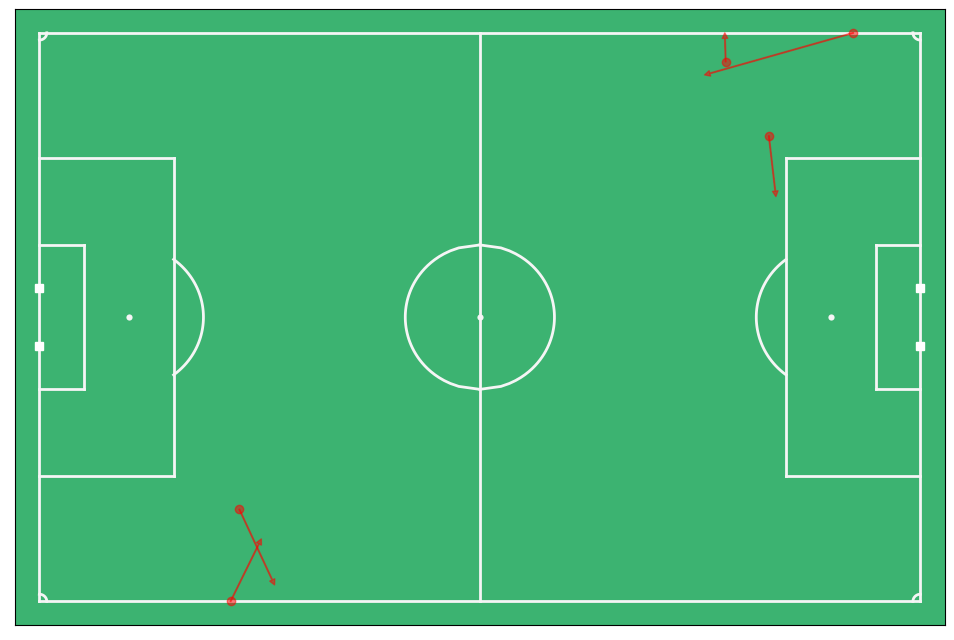

In [21]:
viz.plot_events(event_data_single.iloc[100:110], FIELD_DIMEN)

In [22]:
tracking_single = dh.read_tracking_data(DATA_DIR_single)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

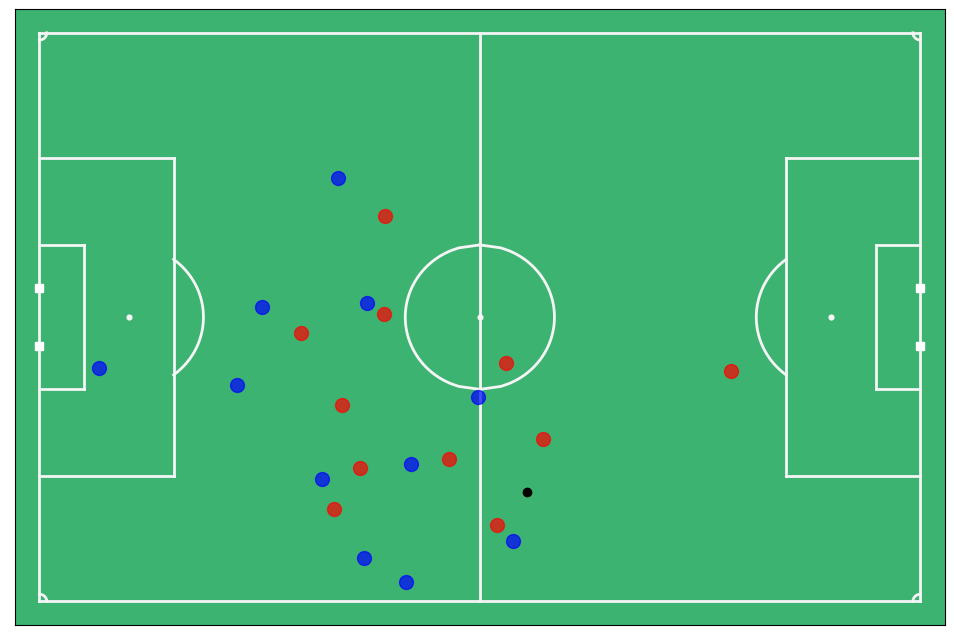

In [23]:
viz.plot_frame(tracking_single.iloc[2316], FIELD_DIMEN)

In [24]:
# passing_events = event_data_single[event_data_single['typeId'] == 1]
# pass_event = passing_events.iloc[119]
#
# match_period = str(pass_event['periodId'])
# timestamp = dh.get_frame(pass_event['timeMin'], pass_event['timeSec'], match_period)
#
# row = tracking_single[(tracking_single['Framecount'] == timestamp) & (tracking_single['Match period'] == match_period)]
# ball_xy = np.array(row['Ball xyz'].iloc[0][:-1])
# ball_carrier = gsr.get_ball_carier(row['Column 5'].iloc[0], ball_xy)
# ball_carrier_xy = np.array([ball_carrier['x'], ball_carrier['y']])
# distance = np.linalg.norm(ball_xy - ball_carrier_xy)
# print(distance)
#
# viz.plot_frame(row.iloc[0], FIELD_DIMEN)

In [25]:
# data = dh.read_event_tracking_data(DATA_DIR, FIELD_DIMEN, SAVE_DIR)
# data.to_pickle(SAVE_DIR, compression='gzip')


In [26]:
pass_data = pd.read_pickle(SAVE_DIR, compression='gzip')
# pass_data

In [27]:
pass_data_ = pass_data.drop(['Event'], axis=1)
X = pass_data_.iloc[:,:-1].to_numpy()
y = pass_data_.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.25)


In [28]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(np.mean(y_train))

475
115
0.8050847457627118


In [29]:
loss = 'binary_crossentropy'
optimizer = 'adam'
epochs = 30

soccermap = soccermap_model.SoccerMap(FIELD_DIMEN)
soccermap.compile(loss, optimizer)

In [30]:
soccermap.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pass_input (InputLayer)        [(None, 108, 72, 13  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 104, 68, 32)  10432       ['pass_input[0][0]']             
                                                                                                  
 zero_padding2d_5 (ZeroPadding2  (None, 112, 76, 32)  0          ['conv2d_21[0][0]']              
 D)                                                                                               
                                                                                            

In [31]:
soccermap.fit(X_train, y_train, X_test, y_test, epochs)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).